In [327]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import copy

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 7)})

In [328]:
N = 100 #số điểm dữ liệu mỗi cụm
u = 10 #mật độ phân tán
n = 3 #số cụm
X = []
cov = [[u, 0], [0, u]]
mean = []
for i in range(n):
  x_mean = np.random.randint(15, 65)
  y_mean = np.random.randint(15, 65)
  mean.append([x_mean, y_mean])
for i in mean:
  X.append(np.random.multivariate_normal(i, cov, N))
X = np.concatenate(X, axis = 0)
df = pd.DataFrame(X, columns=["x","y"])
df.T

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
x,42.395350,42.312064,40.130607,39.320021,36.899774,42.632687,36.09270,41.446929,36.984111,45.609839,...,58.425788,52.915140,53.203429,51.681616,49.461976,56.363262,57.405656,53.70475,55.066929,60.048689
y,16.514467,14.798592,15.534034,22.151296,18.047441,15.477028,22.61493,11.174152,17.429173,14.152095,...,18.503851,18.907716,15.812521,23.946537,14.566943,14.242890,14.318550,17.15867,22.500198,22.807261


In [329]:

df = pd.DataFrame({
    'x': np.random.randint(0,70, size=100),
    'y': np.random.randint(0,70, size=100)
    })
df.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
x,65,48,59,56,10,18,12,20,48,5,...,41,18,41,35,31,10,3,46,52,10
y,43,63,46,60,16,48,20,61,56,13,...,54,7,32,33,17,55,44,10,39,51


In [330]:
# Tạo dữ liệu 
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72, 40 ,62, 14, 74, 34, 42, 55, 7],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 60, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24, 33, 55, 25, 33, 19, 17, 40, 17]
})
df.T

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
x,12,20,28,18,29,33,24,45,45,52,...,69,72,40,62,14,74,34,42,55,7
y,39,36,30,52,54,46,55,59,60,70,...,7,24,33,55,25,33,19,17,40,17


# Phương pháp Elbow chọn số K 

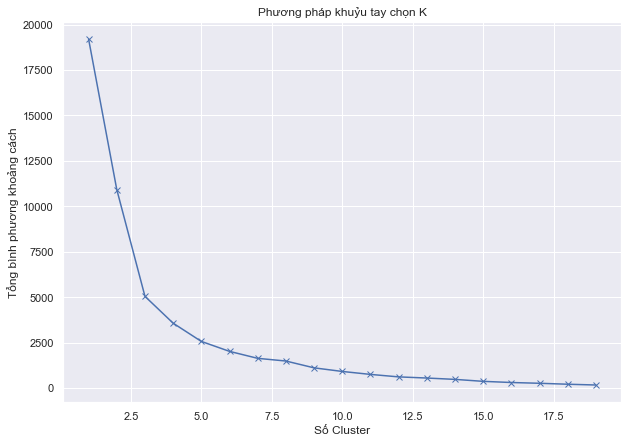

In [331]:
def elbow():
    K = range(1,15)
    Sum_of_squared_distances = []
    for i in K:
        km = KMeans(n_clusters=i)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('Số Cluster')
    plt.ylabel('Tổng bình phương khoảng cách')
    plt.title('Phương pháp khuỷu tay chọn K')
    plt.show()
    return
elbow()

In [332]:
# Số cluster 
k = 3

In [333]:
colors = cm.rainbow(np.linspace(0, 1, k))
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

In [334]:
# Chọn ngẫu nhiên K điểm center từ data
def create_center(k):
    r = []
    for i in range(k): r.append(np.random.randint(0, len(df)))
    print(r)
    centroids = {
        i+1: [df['x'][r[i]], df['y'][r[i]]]
        for i in range(k)
    }
    #print(centroids)
    return centroids

In [335]:
centroids = create_center(k)
centroids

[23, 22, 3]


{1: [34, 19], 2: [74, 33], 3: [18, 52]}

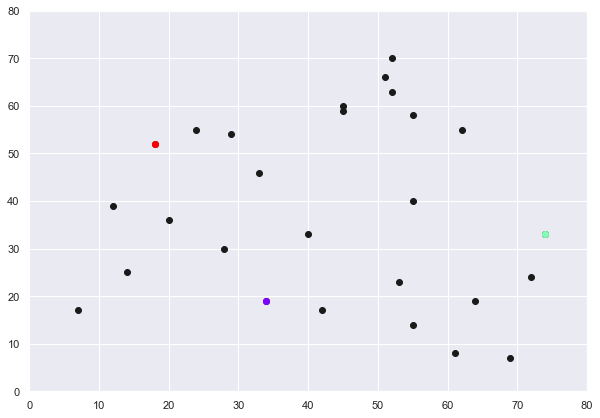

In [336]:
# Vẽ biểu đồ 
plt.scatter(df['x'], df['y'], color='k')
# Vẽ biểu đồ với 3 điểm center
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colors[i-1])

plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()
#ax.legend(fontsize='small')

In [337]:
# Hàm tính khoảng cách từ mỗi điểm dữ liệu đến mỗi center
def assigment(df, centroids):
    for i in centroids.keys():
        #sqrt((x1-x2)^2 - (y1-y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0])**2 +
                (df['y'] - centroids[i][1])**2
            )  
        )     
    centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroids_distance_cols].idxmin(axis=1) # Tìm cluter center gần nhất 
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_'))) # Bỏ đi các ký tự distance_from_
    df['color'] = df['closest'].map(lambda x: colors[x-1]) # Set màu tương tự center
    return df
    
df = assigment(df, centroids)
df

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,29.732137,62.289646,14.317821,3,"[1.0, 1.2246467991473532e-16, 6.12323399573676..."
1,20,36,22.022716,54.083269,16.124515,3,"[1.0, 1.2246467991473532e-16, 6.12323399573676..."
2,28,30,12.529964,46.097722,24.166092,1,"[0.5, 0.0, 1.0, 1.0]"
3,18,52,36.674242,59.135438,0.000000,3,"[1.0, 1.2246467991473532e-16, 6.12323399573676..."
4,29,54,35.355339,49.658836,11.180340,3,"[1.0, 1.2246467991473532e-16, 6.12323399573676..."
5,33,46,27.018512,43.011626,16.155494,3,"[1.0, 1.2246467991473532e-16, 6.12323399573676..."
6,24,55,37.363083,54.626001,6.708204,3,"[1.0, 1.2246467991473532e-16, 6.12323399573676..."
7,45,59,41.484937,38.948684,27.892651,3,"[1.0, 1.2246467991473532e-16, 6.12323399573676..."
8,45,60,42.449971,39.623226,28.160256,3,"[1.0, 1.2246467991473532e-16, 6.12323399573676..."
9,52,70,54.083269,43.046487,38.470768,3,"[1.0, 1.2246467991473532e-16, 6.12323399573676..."


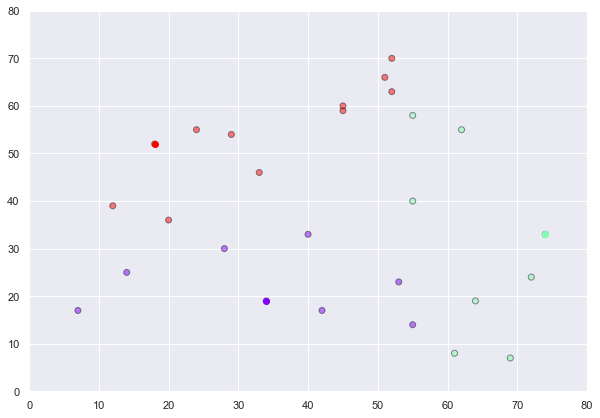

In [338]:
def plot_show():
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colors[i-1])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    plt.show()
plot_show()

In [339]:
old_centroids = copy.deepcopy(centroids)

# Update tọa độ mỗi center sau mỗi vòng lặp 
def update():
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return centroids

update()
print(centroids)

{1: [34.125, 22.25], 2: [64.0, 30.5], 3: [34.63636363636363, 54.54545454545455]}


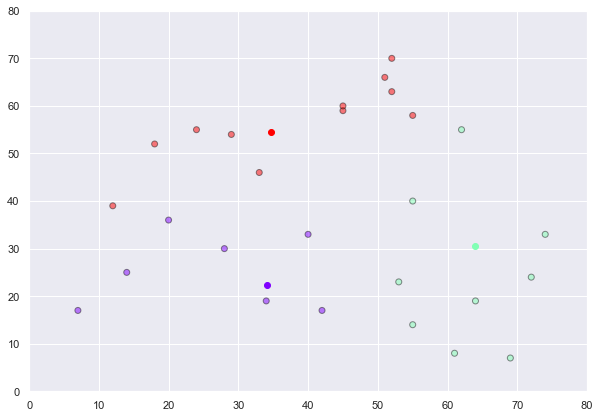

{1: [26.428571428571427, 25.285714285714285], 2: [62.77777777777778, 24.77777777777778], 3: [37.81818181818182, 56.54545454545455]}


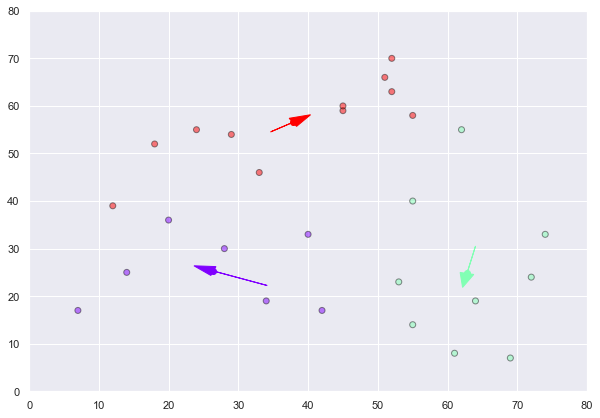

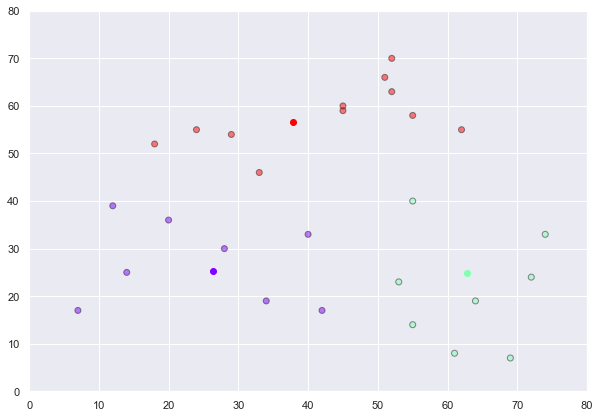

{1: [24.625, 27.0], 2: [62.875, 21.0], 3: [42.36363636363637, 58.0]}


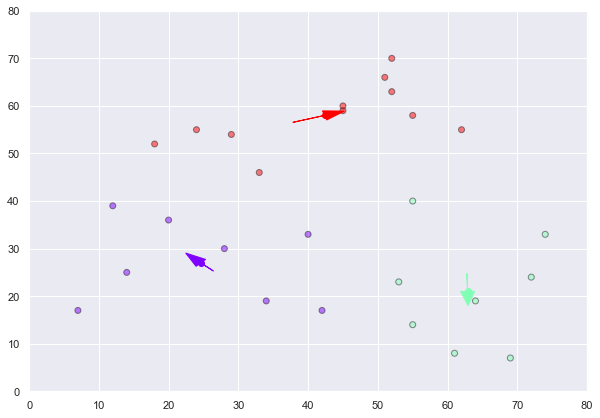

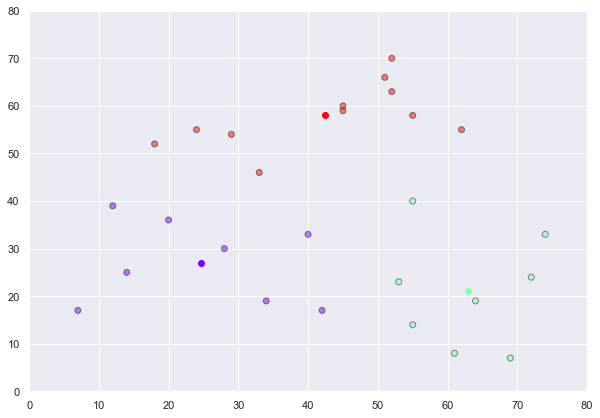

{1: [24.625, 27.0], 2: [62.875, 21.0], 3: [42.36363636363637, 58.0]}


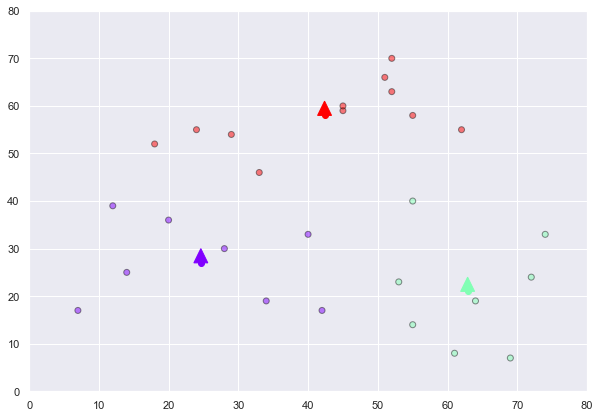

3

In [340]:
# Chạy K_means_clustering => điều kiện dừng khi tọa độ old_center = new_center
n = 0
while old_centroids != centroids:
    n = n +1
    df = assigment(df, centroids)
    #print(df)
    old_centroids = copy.deepcopy(centroids)
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colors[i-1])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    plt.show()
    ax = plt.axes()
    update()
    print(centroids)
    
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colors[i-1])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    for i in old_centroids.keys():
        old_x = old_centroids[i][0]
        old_y = old_centroids[i][1]
        dx = centroids[i][0] - old_centroids[i][0]
        dy = centroids[i][1] - old_centroids[i][1]  
        ax.arrow(old_x, old_y, dx, dy,head_width=2, head_length=3,  fc=colors[i-1], ec=colors[i-1])
    plt.show()
n 

In [341]:
df

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,17.418112,53.965411,35.818297,1,"[0.5, 0.0, 1.0, 1.0]"
1,20,36,10.118825,45.423184,31.370882,1,"[0.5, 0.0, 1.0, 1.0]"
2,28,30,4.515598,36.017574,31.469256,1,"[0.5, 0.0, 1.0, 1.0]"
3,18,52,25.862920,54.541412,25.091568,3,"[1.0, 1.2246467991473532e-16, 6.12323399573676..."
4,29,54,27.352159,47.291814,13.949436,3,"[1.0, 1.2246467991473532e-16, 6.12323399573676..."
5,33,46,20.763926,38.955303,15.220962,3,"[1.0, 1.2246467991473532e-16, 6.12323399573676..."
6,24,55,28.006975,51.645577,18.607072,3,"[1.0, 1.2246467991473532e-16, 6.12323399573676..."
7,45,59,37.936007,41.994233,2.819648,3,"[1.0, 1.2246467991473532e-16, 6.12323399573676..."
8,45,60,38.783252,42.901231,3.309141,3,"[1.0, 1.2246467991473532e-16, 6.12323399573676..."
9,52,70,50.974411,50.192287,15.390241,3,"[1.0, 1.2246467991473532e-16, 6.12323399573676..."


In [342]:
def result():
    cost_function = {
    'Cluster' + str(i+1) : np.sum(df[df['closest'] ==i+1]['distance_from_{}'.format(i+1)])
    for i in range(k)
    }
    print(cost_function)
    x  = 0
    for i in cost_function: x = x + cost_function[i] 
    print('Cost_function for all data:',x)
    counts = df['closest'].value_counts()
    print(counts)
    return

In [343]:
result()

{'Cluster1': 112.00426385774759, 'Cluster2': 97.85871388793728, 'Cluster3': 149.51724008746024}
Cost_function for all data: 359.38021783314514
3    11
1     8
2     8
Name: closest, dtype: int64


----
# K Means Clutering trong dữ liệu đa chiều

In [344]:
d = 8 # số chiều
df = {
    i+1 : np.random.randint(0,100, size=100)
    for i in range(d)
}
df = pd.DataFrame(df)
df.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,15,52,44,34,79,39,23,12,67,2,...,93,70,66,67,56,87,21,41,17,73
2,69,44,58,56,53,16,40,83,37,59,...,69,60,94,3,25,35,23,65,57,26
3,24,25,88,8,66,99,10,46,81,14,...,64,96,27,5,24,27,81,24,2,96
4,35,68,15,28,59,80,72,56,83,76,...,20,27,81,40,0,50,91,80,30,77
5,30,93,63,78,19,19,15,43,70,39,...,84,50,48,5,70,63,24,31,84,28
6,1,50,30,28,86,92,33,61,90,59,...,59,48,45,64,56,17,58,41,49,81
7,5,31,42,55,58,84,3,2,86,41,...,10,71,8,1,32,9,66,60,5,9
8,8,29,85,8,11,46,51,38,8,60,...,90,28,38,3,39,25,17,3,89,54


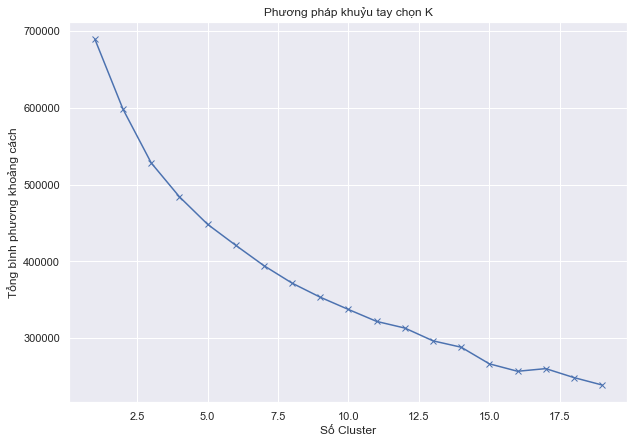

In [345]:
elbow()

In [346]:
# Số cluster 
k = 8

In [347]:
def center_array(D,row):
    x = []
    for d in range(D): x.append(df[d+1][row])
    return x

In [348]:
def create_center(k):
    r =  np.random.randint(0, len(df), size = k)
    #r = [10,3,12,32]
    print(r)
    centroids = {
        i+1: center_array(d,r[i])
        for i in range(k)
    }
    #print(centroids)
    return centroids

In [349]:
centroids = create_center(k)
centroids

[34 17  3 77 35  6 83 42 32 26]


{1: [65, 33, 48, 15, 26, 67, 89, 84],
 2: [53, 7, 35, 38, 80, 5, 65, 53],
 3: [34, 56, 8, 28, 78, 28, 55, 8],
 4: [20, 69, 4, 58, 57, 51, 7, 41],
 5: [81, 94, 32, 86, 99, 80, 82, 73],
 6: [23, 40, 10, 72, 15, 33, 3, 51],
 7: [55, 99, 30, 47, 12, 22, 64, 98],
 8: [51, 66, 67, 6, 70, 9, 72, 51],
 9: [18, 42, 18, 87, 1, 26, 1, 97],
 10: [83, 85, 47, 60, 83, 5, 76, 9]}

### Lí thuyết
**Theo tiên đề Eculic về khoảng cách giữa 2 điểm trong không gian đa chiều**
- Công thức tính khoảng cách 2 giữa 2 điểm $A(p_{1}, p_{2},...p_{n}), B(q_{1}, q_{2},...q{n})$ 
    - distance_AB = $\sqrt{(p_{1} - q_{1})^2 + (p_{2} - q_{2})^2 + ... + (p_{n} - q_{n})^2}$ 

In [350]:
def distance_center(cluter):
    distance = 0
    for i in range(d-1):
        distance = distance + (df[i+1] - centroids[cluter][i])**2
    return np.sqrt(distance)

In [351]:
# Hàm tính khoảng cách từ mỗi điểm dữ liệu đến mỗi center
def assigment(df, centroids):
    for i in centroids.keys():
        # Theo Eculic
        df['distance_from_{}'.format(i)] = (
            distance_center(i)  
        )     
    centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroids_distance_cols].idxmin(axis=1) # Tìm cluter center gần nhất 
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_'))) # Bỏ đi các ký tự distance_from_
    return df   
df = assigment(df, centroids)
df

,1,2,3,4,5,6,7,8,distance_from_1,distance_from_2,distance_from_3,distance_from_4,distance_from_5,distance_from_6,distance_from_7,distance_from_8,distance_from_9,distance_from_10,closest
0,15,69,24,35,30,1,5,8,127.279221,107.396462,79.799749,64.707032,156.770533,61.016391,83.222593,100.737282,70.427267,117.898261,6
1,52,44,25,68,93,50,31,29,108.489631,75.630682,60.348985,63.741666,85.152804,90.857031,109.242849,99.919968,107.284668,85.673800,3
2,44,58,88,15,63,30,42,85,87.252507,86.388657,84.089238,106.320271,127.428411,118.033893,96.638502,45.000000,128.674007,90.205321,8
3,34,56,8,28,78,28,55,8,92.951600,64.992307,0.000000,67.490740,107.084079,94.947354,87.223850,71.189887,113.498899,82.352899,3
4,79,53,66,59,19,86,58,11,65.015383,120.519708,114.947814,113.366662,102.868849,111.624370,91.175655,111.754195,118.756052,111.278929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,87,35,27,50,63,17,9,25,111.458512,75.610846,80.975305,86.220647,124.225601,86.544786,103.870111,99.373035,101.237345,89.716219,2
96,21,23,81,91,24,58,66,17,97.544861,110.231574,120.386876,117.277449,132.030300,101.833197,113.635382,121.338370,100.662803,127.259577,1
97,41,65,24,80,31,41,60,3,89.123510,95.472509,74.114776,70.185469,95.760117,69.123079,56.700970,100.573356,75.822160,85.726309,7
98,17,57,2,30,84,49,5,89,126.352681,102.474387,57.506521,40.963398,128.903064,84.699469,116.940156,111.009009,105.664564,122.649908,4


In [352]:
def new_center(cluter,d):
    for i in range(d):
        #print(i)
        centroids[cluter][i] = np.mean(df[df['closest'] == cluter][i+1])
        #print(np.mean(df[df['closest'] == cluter][i+1]))
    return

In [353]:
old_centroids = copy.deepcopy(centroids)

# Update tọa độ mỗi center sau mỗi vòng lặp 
def update(k):
    for cluter in centroids.keys():
        new_center(cluter,d)
    return k
centroids = update(centroids)
centroids

{1: [56.21052631578947,
  31.263157894736842,
  64.57894736842105,
  44.526315789473685,
  36.68421052631579,
  73.89473684210526,
  59.73684210526316,
  41.421052631578945],
 2: [61.81818181818182,
  13.727272727272727,
  48.90909090909091,
  59.36363636363637,
  71.9090909090909,
  30.09090909090909,
  53.36363636363637,
  50.63636363636363],
 3: [39.75,
  46.5,
  20.833333333333332,
  33.0,
  70.41666666666667,
  52.333333333333336,
  54.416666666666664,
  36.75],
 4: [30.3, 66.8, 35.8, 53.3, 62.1, 69.0, 18.4, 46.0],
 5: [65.0, 71.0, 45.3, 83.1, 74.3, 77.3, 62.4, 36.2],
 6: [36.833333333333336,
  26.0,
  36.916666666666664,
  70.16666666666667,
  17.416666666666668,
  61.416666666666664,
  19.083333333333332,
  26.5],
 7: [61.5, 75.0, 24.8, 54.1, 19.3, 31.6, 66.3, 67.2],
 8: [68.5, 58.4, 80.8, 17.9, 63.4, 29.1, 51.5, 47.3],
 9: [18.0, 42.0, 18.0, 87.0, 1.0, 26.0, 1.0, 97.0],
 10: [79.6, 77.8, 64.6, 72.8, 56.4, 19.2, 71.0, 40.8]}

In [354]:
n = 0
while old_centroids != centroids:
    n = n+1
    df = assigment(df, centroids) # tính khoảng cách và label các điểm dữ liệu
    old_centroids = copy.deepcopy(centroids) # copy các điểm center ra 1 tập mới
    centroids = update(centroids) # cập nhập các điểm center
n 

7

In [355]:
pd.DataFrame(centroids).T

,0,1,2,3,4,5,6,7
1,55.928571,35.714286,83.214286,52.285714,38.571429,81.714286,40.357143,34.071429
2,59.875000,13.500000,45.875000,73.625000,65.875000,29.750000,58.125000,46.125000
3,44.142857,38.000000,29.142857,24.000000,71.142857,62.285714,55.285714,39.714286
4,24.000000,75.142857,14.714286,46.714286,57.142857,55.857143,15.571429,48.571429
5,62.833333,70.083333,41.000000,82.333333,67.916667,76.750000,63.916667,36.916667
6,29.818182,14.909091,35.000000,77.000000,17.818182,74.000000,48.090909,36.818182
7,57.000000,70.222222,23.888889,56.777778,21.333333,29.333333,75.777778,63.000000
8,73.266667,51.266667,73.600000,18.600000,66.200000,32.533333,45.466667,47.066667
9,39.200000,59.400000,20.800000,59.800000,15.000000,12.800000,3.600000,60.800000
10,79.600000,77.800000,64.600000,72.800000,56.400000,19.200000,71.000000,40.800000


In [356]:
df

,1,2,3,4,5,6,7,8,distance_from_1,distance_from_2,distance_from_3,distance_from_4,distance_from_5,distance_from_6,distance_from_7,distance_from_8,distance_from_9,distance_from_10,closest
0,15,69,24,35,30,1,5,8,120.110812,109.545724,99.674880,64.807250,124.360587,111.196349,90.150765,101.886887,40.856823,112.747506,9
1,52,44,25,68,93,50,31,29,88.180213,57.803682,57.178382,62.216049,60.723874,89.664480,91.695416,80.870294,93.297803,85.927877,3
2,44,58,88,15,63,30,42,85,72.978715,87.818083,72.321279,92.042581,99.667224,112.807120,95.139339,33.924491,103.064446,80.925892,8
3,34,56,8,28,78,28,55,8,108.598375,78.433192,45.962052,60.227968,87.341603,103.060842,73.868084,78.782429,89.753440,92.548366,3
4,79,53,66,59,19,86,58,11,43.418643,88.917184,85.510711,102.274740,65.084987,73.473501,78.048023,83.482959,109.554918,82.690991,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,87,35,27,50,63,17,9,25,99.494616,68.531129,82.375943,85.612797,98.317795,106.230414,92.432224,72.056028,73.249437,87.821410,2
96,21,23,81,91,24,58,66,17,65.708501,75.833803,101.461162,112.822780,89.031206,55.409147,94.251109,108.066358,110.776712,98.068344,6
97,41,65,24,80,31,41,60,3,86.346685,69.814151,77.382696,66.814089,58.764124,64.565618,36.070062,94.772382,68.447644,67.789380,7
98,17,57,2,30,84,49,5,89,115.952731,105.261653,68.854475,41.222146,105.031212,109.980953,110.880038,103.348300,88.393891,126.916508,4


In [357]:
result()

{'Cluster1': 745.9048041079675, 'Cluster2': 486.5033446807166, 'Cluster3': 742.4998354247522, 'Cluster4': 307.95517122051217, 'Cluster5': 722.2934806526064, 'Cluster6': 589.3229909206004, 'Cluster7': 423.6335798778424, 'Cluster8': 857.8487160593296, 'Cluster9': 206.1367813464105, 'Cluster10': 178.44587005884523}
Cost_function for all data: 5260.544574349584
8     15
3     14
1     14
5     12
6     11
7      9
2      8
4      7
9      5
10     5
Name: closest, dtype: int64
